Артем, рад приветствовать тебя)

На связи твой тимлид Александр Дьяченко, думаю правила ты знаешь, но я повторю.  
Предлагаю общаться на "ты", если это для тебя приемлемо)  

В твоей работе я оставлю некоторые комментарии, которые помогут лучше понять материал или скажу, что все сделано верно.  
Давай договоримся об условных обозначениях, чтобы наше общение было эффективнее:  

Комментарии будут в <font color='green'>зеленой ✔️</font>, <font color='orange'>оранжевой ⚠️</font> или <font color='red'>красной ❌</font> рамках:


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Зеленым цветом помечены образцовые решения. Которые можно использовать в дальнейшем.
    
</div>

<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Рекомендация ⚠️</b>
       
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
    
</div>

<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью.
    
</div>

-------------------

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Свои комментарии и вопросы ты можешь оставлять в синей рамочке. Также используй её, если что-то исправил, доделал или полностью переписал.</div>




Старайся отвечать на мои рекомендации и не удалять комментарии, так получится проверить работу быстрее)

Погнали!



-------

# Телеком

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*)

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Хорошее введение
    
</div>


## План решения задачи:

1. Предобработка данных:
    - Изучение данных из датафреймов;
    - Проверка данных на наличие пропусков, дубликатов, несоответствие типов фактическим данным;
    - Обработка найденных ошибок и создание новых признаков при необходимости.
2. Исследовательский анализ данных:
    - Исследование зависимости целевого признака от других признаков;
    - Проверка данных на наличие мультиколлинеарности;
    - Проверка на сбалансированность классов в целевом признаке.
3. Построение и обучение моделей:
    - Кодирование категориальных признаков;
    - Масштабирование количественных признаков.
    - Определение лучшей модели и ее оптимальных гиперпараметров на обучающей выборке с использование кросс-валидации;
    - Оценка качества лучшей модели на тестовой выборке;  
    

<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Рекомендация ⚠️</b>
       
Анализ лучшей модели (важность признаков, матрица ошибок)
    
</div>
 
    
5. Составление отчета по проделанной работе и полученными результатам.

## Предобработка данных

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime

import phik
from phik.report import plot_correlation_matrix

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from catboost import CatBoostClassifier
import lightgbm as lgb

<IPython.core.display.Javascript object>

In [3]:
try:
    df_contract = pd.read_csv("final_provider/contract.csv")
    df_internet = pd.read_csv("final_provider/internet.csv")
    df_personal = pd.read_csv("final_provider/personal.csv")
    df_phone = pd.read_csv("final_provider/phone.csv")
except FileNotFoundError:
    df_contract = pd.read_csv("/datasets/final_provider/contract.csv")
    df_internet = pd.read_csv("/datasets/final_provider/internet.csv")
    df_personal = pd.read_csv("/datasets/final_provider/personal.csv")
    df_phone = pd.read_csv("/datasets/final_provider/phone.csv")

<IPython.core.display.Javascript object>


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
Если ты работаешь локально, то все должно работать и подгружаться как локально, так и на платформе без внесения дополнительных изменений в код, тебе поможет конструкция try/except
    
</div>

<div class="alert alert-info">
Исправил.
</div>

Изучим данные из датафреймов.

In [4]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


<IPython.core.display.Javascript object>

Видим, что в данном датафрейме нет пропусков.

In [5]:
df_contract.head()

customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65

<IPython.core.display.Javascript object>

Проверим столбец `customerID` на уникальность.

In [6]:
df_contract.duplicated("customerID").sum()

0

<IPython.core.display.Javascript object>

Видим, что все идентификаторы пользователей уникальны.

В столбце `EndDate` содержаться значения 'No', которые означают, что данные клиент имеет действующий договор с компанией. Используя данный признак, создадим целевой признак `left`, которые будет содержать информацию о том, ушел ли данный клиент из компании или нет.

In [7]:
df_contract.loc[df_contract["EndDate"] == "No", "left"] = 0
df_contract.loc[df_contract["EndDate"] != "No", "left"] = 1

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
С целевым разобрались
    
</div>


In [8]:
df_contract.head()

customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   left  
0   0.0  
1   0.0  
2   1.0  
3   0.0  
4   1.0

<IPython.core.display.Javascript object>

Заменим значение 'No' в `EndDate` на дату 1 февраля 2020, которая является актуальной для наших данных.

In [9]:
df_contract["EndDate"] = df_contract["EndDate"].replace("No", "2020-02-01 00:00:00")

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Отлично!
    
</div>


In [10]:
df_contract.head()

customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01  2020-02-01 00:00:00  Month-to-month   
1  5575-GNVDE  2017-04-01  2020-02-01 00:00:00        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01  2020-02-01 00:00:00        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   left  
0   0.0  
1   0.0  
2   1.0  
3   0.0  
4   1.0

<IPython.core.display.Javascript object>

Преобразуем даты в столбцах `BeginDate` и `EndDate` к типу datetime и найдем уникальные значения в этих столбцах.

In [11]:
df_contract["EndDate"] = pd.to_datetime(df_contract["EndDate"], format="%Y-%m-%d")
df_contract["BeginDate"] = pd.to_datetime(df_contract["BeginDate"], format="%Y-%m-%d")

<IPython.core.display.Javascript object>

In [12]:
df_contract["EndDate"].unique()

array(['2020-02-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

<IPython.core.display.Javascript object>

In [13]:
df_contract["BeginDate"].unique()

array(['2020-01-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2015-04-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2015-10-01T00:00:00.000000000', '2014-03-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2017-11-01

<IPython.core.display.Javascript object>

Видим, что в таблицу данные добавляются раз в месяц, поэтому создадим новый столбец `length_month`, в котором будет хранится информация о длительности работы компании с каждым клиентом по 1 февраля 2020. Данный столбец будет полезным для дальнейшего анализа ухода клиента.

In [14]:
df_contract["length_days"] = (df_contract["EndDate"] - df_contract["BeginDate"]).dt.days

<IPython.core.display.Javascript object>

In [15]:
df_contract.head()

customerID  BeginDate    EndDate            Type PaperlessBilling  \
0  7590-VHVEG 2020-01-01 2020-02-01  Month-to-month              Yes   
1  5575-GNVDE 2017-04-01 2020-02-01        One year               No   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              Yes   
3  7795-CFOCW 2016-05-01 2020-02-01        One year               No   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  left  length_days  
0           Electronic check           29.85        29.85   0.0           31  
1               Mailed check           56.95       1889.5   0.0         1036  
2               Mailed check           53.85       108.15   1.0           61  
3  Bank transfer (automatic)           42.30      1840.75   0.0         1371  
4           Electronic check           70.70       151.65   1.0           61

<IPython.core.display.Javascript object>

Теперь можно удалить столбцы `BeginDate` и `EndDate`, так как они больше не содержат полезной информации.

In [16]:
df_contract.drop(["BeginDate", "EndDate"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [17]:
df_contract.head()

customerID            Type PaperlessBilling              PaymentMethod  \
0  7590-VHVEG  Month-to-month              Yes           Electronic check   
1  5575-GNVDE        One year               No               Mailed check   
2  3668-QPYBK  Month-to-month              Yes               Mailed check   
3  7795-CFOCW        One year               No  Bank transfer (automatic)   
4  9237-HQITU  Month-to-month              Yes           Electronic check   

   MonthlyCharges TotalCharges  left  length_days  
0           29.85        29.85   0.0           31  
1           56.95       1889.5   0.0         1036  
2           53.85       108.15   1.0           61  
3           42.30      1840.75   0.0         1371  
4           70.70       151.65   1.0           61

<IPython.core.display.Javascript object>

Выведем статистические данные по численному признаку `MonthlyCharges`.

In [18]:
df_contract["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<IPython.core.display.Javascript object>

Видим, что среднее значение несильно отклоняется от медианного, значит, в данном признаке нет выбросов.

Посмотрим на уникальные значения в оставшихся столбцах.

In [19]:
df_contract["Type"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
df_contract["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
df_contract["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
df_contract["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

<IPython.core.display.Javascript object>

Видим, что в `TotalCharges` есть 11 "пустых" значений, посмотрим, что это за значения.

In [23]:
df_contract[df_contract["TotalCharges"] == " "]

customerID      Type PaperlessBilling              PaymentMethod  \
488   4472-LVYGI  Two year              Yes  Bank transfer (automatic)   
753   3115-CZMZD  Two year               No               Mailed check   
936   5709-LVOEQ  Two year               No               Mailed check   
1082  4367-NUYAO  Two year               No               Mailed check   
1340  1371-DWPAZ  Two year               No    Credit card (automatic)   
3331  7644-OMVMY  Two year               No               Mailed check   
3826  3213-VVOLG  Two year               No               Mailed check   
4380  2520-SGTTA  Two year               No               Mailed check   
5218  2923-ARZLG  One year              Yes               Mailed check   
6670  4075-WKNIU  Two year               No               Mailed check   
6754  2775-SEFEE  Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges  left  length_days  
488            52.55                0.0            0  
753            20.25                0.0            0  
936            80.85                0.0            0  
1082           25.75                0.0            0  
1340           56.05                0.0            0  
3331           19.85                0.0            0  
3826           25.35                0.0            0  
4380           20.00                0.0            0  
5218           19.70                0.0            0  
6670           73.35                0.0            0  
6754           61.90                0.0            0

<IPython.core.display.Javascript object>

Видим, что это данных о новых клиентах, их немного, они не являются информативными для дальнейшего анализа, поэтому их можно удалить.

In [24]:
df_contract = df_contract.loc[df_contract["TotalCharges"] != " "]

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Да, таких объектов мало, можем от них избавиться
    
</div>


In [25]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   object 
 6   left              7032 non-null   float64
 7   length_days       7032 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 494.4+ KB


<IPython.core.display.Javascript object>

Изменим тип данных `TotalCharges` на float.

In [26]:
df_contract["TotalCharges"] = df_contract["TotalCharges"].astype("float")

<IPython.core.display.Javascript object>

In [27]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   left              7032 non-null   float64
 7   length_days       7032 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 494.4+ KB


<IPython.core.display.Javascript object>

Проверим полученный датафрейм на наличие дубликатов.

In [28]:
df_contract.duplicated().sum()

0

<IPython.core.display.Javascript object>

Рассмотрим теперь датасет `df_personal`.

In [29]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


<IPython.core.display.Javascript object>

In [30]:
df_personal.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

<IPython.core.display.Javascript object>

In [31]:
df_personal.duplicated("customerID").sum()

0

<IPython.core.display.Javascript object>

In [32]:
df_personal["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<IPython.core.display.Javascript object>

Видим, что в выборке почти равное количество мужчин и женщин.

In [33]:
df_personal["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<IPython.core.display.Javascript object>

In [34]:
df_personal[df_personal["SeniorCitizen"] == 1][
    "SeniorCitizen"
].count() / df_personal.shape[0] * 100

16.21468124378816

<IPython.core.display.Javascript object>

Пожилых людей в среди клиентов компании всего 16%.

In [35]:
df_personal["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<IPython.core.display.Javascript object>

Клиентов с партнером или без примерно поровну.

In [36]:
df_personal["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<IPython.core.display.Javascript object>

Клиентов с иждивенцами в два раза меньше, чем без.

In [37]:
df_personal.duplicated().sum()

0

<IPython.core.display.Javascript object>

Никаких аномалий в данных `df_personal` не обнаружено.

Посмотрим на содержимое следующего датафрейма.

In [38]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


<IPython.core.display.Javascript object>

In [39]:
df_internet.duplicated("customerID").sum()

0

<IPython.core.display.Javascript object>

In [40]:
df_internet["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

<IPython.core.display.Javascript object>

In [41]:
df_internet["OnlineSecurity"].value_counts()

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

<IPython.core.display.Javascript object>

In [42]:
df_internet["OnlineBackup"].value_counts()

No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

<IPython.core.display.Javascript object>

In [43]:
df_internet["DeviceProtection"].value_counts()

No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

<IPython.core.display.Javascript object>

In [44]:
df_internet["TechSupport"].value_counts()

No     3473
Yes    2044
Name: TechSupport, dtype: int64

<IPython.core.display.Javascript object>

In [45]:
df_internet["StreamingTV"].value_counts()

No     2810
Yes    2707
Name: StreamingTV, dtype: int64

<IPython.core.display.Javascript object>

In [46]:
df_internet["StreamingMovies"].value_counts()

No     2785
Yes    2732
Name: StreamingMovies, dtype: int64

<IPython.core.display.Javascript object>

In [47]:
df_internet.duplicated().sum()

0

<IPython.core.display.Javascript object>

Из полученных данных видно, что датафрейм `df_internet` содержит меньше записей, чем предыдущие два датасета, так как не все клиенты компании пользуются интернетом.

In [48]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


<IPython.core.display.Javascript object>

In [49]:
df_phone.duplicated("customerID").sum()

0

<IPython.core.display.Javascript object>

In [50]:
df_phone["MultipleLines"].value_counts()

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

<IPython.core.display.Javascript object>

Видим, что существуют пользователи, которые не пользуются услугами связи данной компании, так количество договоров больше количество идентификаторов пользователей в `df_phone`.

Для дальнейшего анализа объединим все исходные датафреймы в один по общему признаку `customerID`.

In [51]:
df = df_contract.merge(df_personal, on="customerID")

<IPython.core.display.Javascript object>

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   left              7032 non-null   float64
 7   length_days       7032 non-null   int64  
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 714.2+ KB


<IPython.core.display.Javascript object>

In [53]:
df = df.merge(df_internet, on="customerID", how="left")
df = df.merge(df_phone, on="customerID", how="left")

<IPython.core.display.Javascript object>

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   left              7032 non-null   float64
 7   length_days       7032 non-null   int64  
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   5512 non-null   object 
 13  OnlineSecurity    5512 non-null   object 
 14  OnlineBackup      5512 non-null   object 
 15  DeviceProtection  5512 non-null   object 
 16  TechSupport       5512 non-null   object 


<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Объединение сделано корректно
    
</div>

Видим, что в полученном датафрейме образовались пропуски в столбцах, содержащих информацию об услугах связи и интернета.

Для услуг интернета заполним пропуски значением 'No', аналогично, пропущенные значения в столбце `MultipleLines` - 'No'.

In [55]:
df.fillna("No", inplace=True)

<IPython.core.display.Javascript object>


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
Для заполнения пропусков тут следует использовать уже имеющуюся категорию 'No', т.к. большинство признаков бинарные (Yes/No) и введение 3 категории в них будет искажать данные, услуги могут быть либо подключены, либо нет, третьего состояния у них быть не может. Также 'No' подойдет и для признаков где категории отличаются от Yes/No, это будет новой категорией в этих признаках)
    
</div>

<div class="alert alert-info">
Исправил.
</div>

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   left              7032 non-null   float64
 7   length_days       7032 non-null   int64  
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   object 
 14  OnlineBackup      7032 non-null   object 
 15  DeviceProtection  7032 non-null   object 
 16  TechSupport       7032 non-null   object 


<IPython.core.display.Javascript object>

In [57]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

## Список вопросов:

1. С помощью каких метрик определять качество моделей?
2. Установлены ли какие-то пороговые значения метрик на тестовой выборке для того, чтобы считать полученную модель достаточно точной?
3. Правильно ли я понял, что в данной задаче решается задача бинарной классификации (уйдет/не уйдет клиент)?
4. Что должно входить в первый проект, который мы прикрепляем на платформе?

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида ✔️</b>
       
1. ROC-AUC  
2. ROC-AUC >= 0.85  
3. Верно  
4. Если я правильно понял вопрос, то ты все сделал верно и именно эта работа должна была тут оказаться) 
    
</div>



<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Итоговый комментарий тимлида ⚠️</b>
       
В целом хорошее выполнение первой части проекта, познакомились с данными, описали некоторые моменты и сформулировали план работы. Осталось поправить моменты, которые я отметил, буду ждать)
    
</div>


<div class="alert alert-info">
Спасибо за замечания и ответы на вопросы, общая структура проекта в целом понятно, на данный момент вопросов больше нет.
</div>

## Исследовательский анализ данных

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2 ✔️</b>
       
Комментарии ко второй части будут с таким заголовком)
    
</div>


Проверим наши данные на мультиколлинеарность.

In [58]:
df = df.set_index("customerID")

<IPython.core.display.Javascript object>

In [59]:
interval_cols = ["MonthlyCharges", "TotalCharges", "length_days"]

<IPython.core.display.Javascript object>

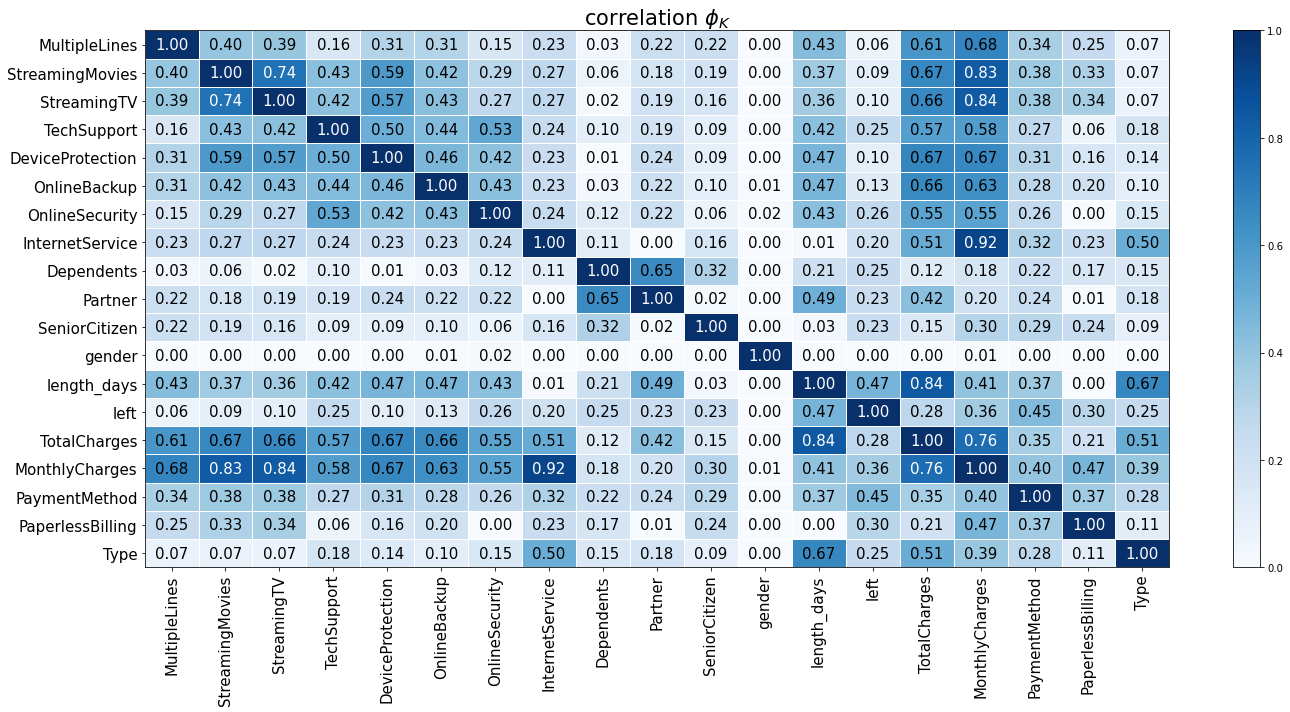

<IPython.core.display.Javascript object>

In [60]:
phik_overview = df.phik_matrix(interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0,
    vmax=1,
    color_map="Blues",
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(20, 10),
)
plt.tight_layout()

Из полученной корреляционной матрицы следует, что наблюдается высокая корреляция (> 0.8) между `TotalCharges` и `length_days`, но это логично, так как чем больше клиент пользуется сервисами компании, тем больше он платит. Удалим столбец `TotalCharges`, так как вся информация, которую он несет, содержится в столбцах `length_days` и `MonthlyCharges`.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2 ✔️</b>
       
Хорошее решение
    
</div>


In [61]:
df.drop(["TotalCharges"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [62]:
interval_cols = ["MonthlyCharges", "length_days"]

<IPython.core.display.Javascript object>

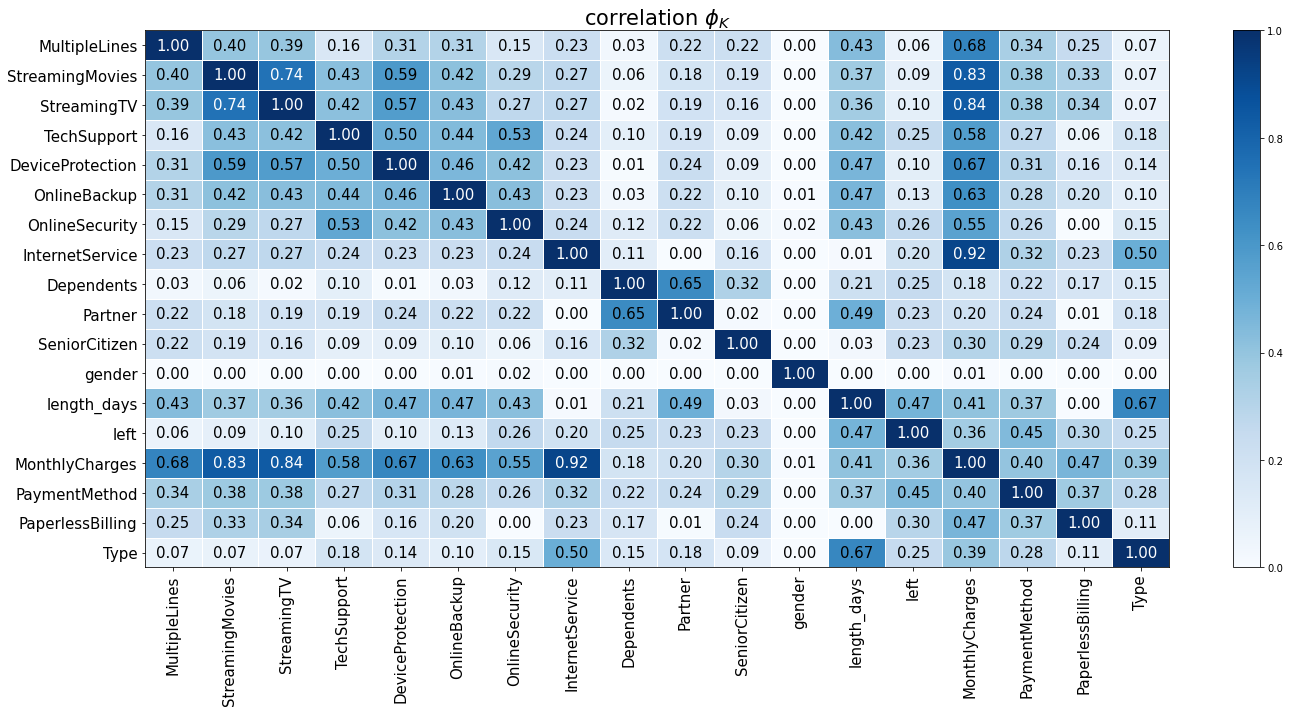

<IPython.core.display.Javascript object>

In [63]:
phik_overview = df.phik_matrix(interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0,
    vmax=1,
    color_map="Blues",
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(20, 10),
)
plt.tight_layout()

Заметим также, что существуют достаточно высокие корреляции между `MonthlyCharges` и дополнительными услугами, особенно сильные корреляции со стриминговыми сервисами. Более того, стриминговые сервисы связаны и между собой достаточно сильной связью, возможно, это из-за того, что они продаются одним пакетом услуг. Также стоит отметить, что месячная стоимость услуг сильно зависит от типа интернет-соединения `InternetService`.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   object 
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   left              7032 non-null   float64
 5   length_days       7032 non-null   int64  
 6   gender            7032 non-null   object 
 7   SeniorCitizen     7032 non-null   int64  
 8   Partner           7032 non-null   object 
 9   Dependents        7032 non-null   object 
 10  InternetService   7032 non-null   object 
 11  OnlineSecurity    7032 non-null   object 
 12  OnlineBackup      7032 non-null   object 
 13  DeviceProtection  7032 non-null   object 
 14  TechSupport       7032 non-null   object 
 15  StreamingTV       7032 non-null   object 
 16  StreamingMovies   7032 non-null 

<IPython.core.display.Javascript object>

Проанализируем, какие данные больше всего влияют на уход клиентов.

In [65]:
def hist_plot(x):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(
        df, x=x, hue="left", stat="percent", multiple="dodge", shrink=0.8,
    )

    for i in ax.containers:
        ax.bar_label(i,)

    ax.set_title(
        "Распределение количества ушедших и оставшихся клиентов в зависимости от значения "
        + x
    )

<IPython.core.display.Javascript object>

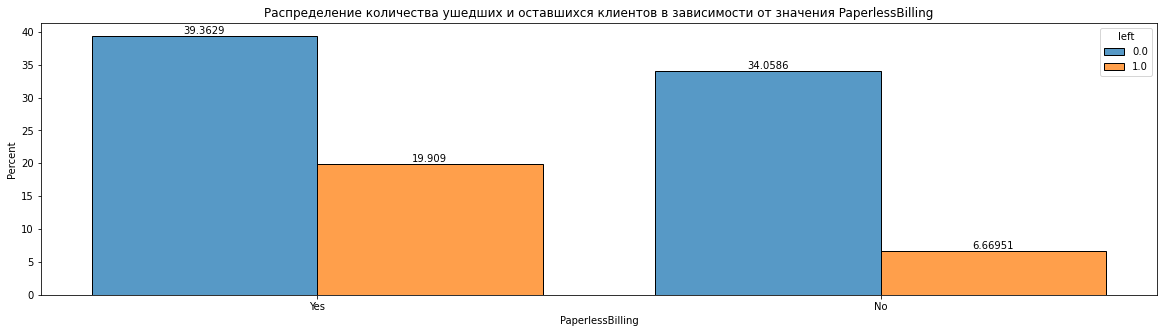

<IPython.core.display.Javascript object>

In [66]:
hist_plot("PaperlessBilling")

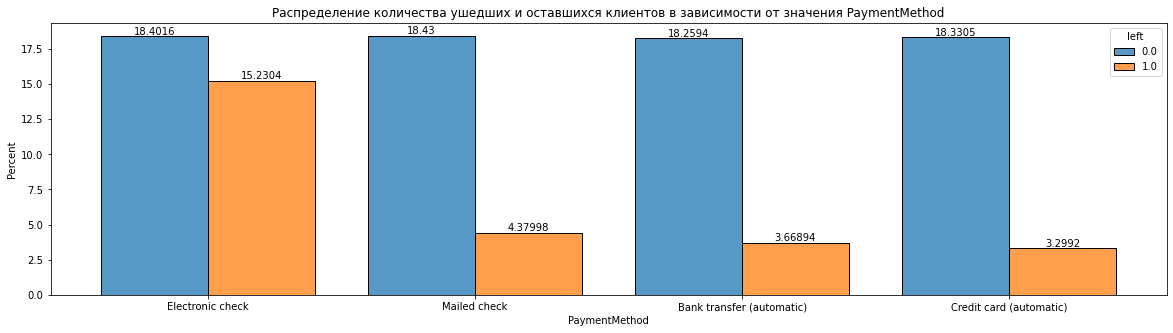

<IPython.core.display.Javascript object>

In [67]:
hist_plot("PaymentMethod")

Из полученных гистограмм следует, что большее количество клиентов оплачивают услуги электронно, без бумажного чека, что соответствует современному тренду, при этом 50% из тех, кто оплачивал без получения бумажного чека, и подавляющее большинство из тех, кто оплачивал электронно, ушли. По-видимому, компании стоит подумать над улучшением сервиса онлайн-платежей.

Попробуем теперь составить портрет уходящего клиента.

Начнем с пола.

In [68]:
def bar_plot(x):
    agg_df = df.groupby([x, "left"]).count()["Type"].unstack()
    fig, ax = plt.subplots(figsize=(8, 6))

    colors = ["#24b1a2", "#ae24b2"]
    bottom = np.zeros(len(agg_df))

    for i, col in enumerate(agg_df.columns):
        ax.bar(agg_df.index, agg_df[col], bottom=bottom, label=col, color=colors[i])
        bottom += np.array(agg_df[col])

    totals = agg_df.sum(axis=1)
    y_offset = 8
    for i, total in enumerate(totals):
        ax.text(
            totals.index[i], total + y_offset, round(total), ha="center", weight="bold"
        )

    y_offset = -200
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + bar.get_y() + y_offset,
            round(bar.get_height()),
            ha="center",
            color="w",
            weight="bold",
            size=10,
        )

    ax.set_title("Распределение оставшихся и ушедших клиентов по " + x)
    ax.legend(title="left")

<IPython.core.display.Javascript object>

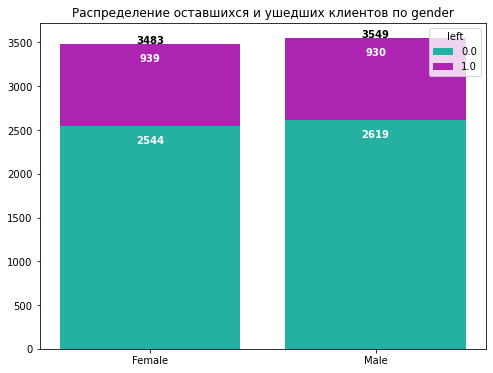

<IPython.core.display.Javascript object>

In [69]:
bar_plot("gender")

Из полученного графика следует, что уход клиента не связан с полом, поэтому можно удалить этот признак.

In [70]:
df.drop("gender", axis=1, inplace=True)

<IPython.core.display.Javascript object>

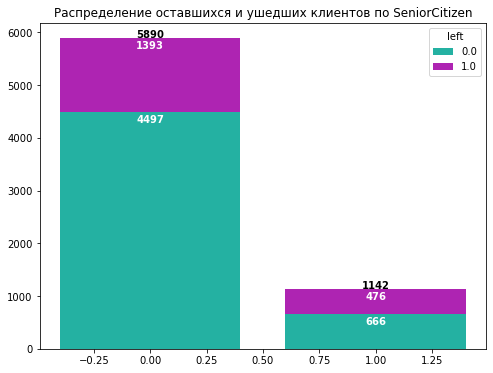

<IPython.core.display.Javascript object>

In [71]:
bar_plot("SeniorCitizen")

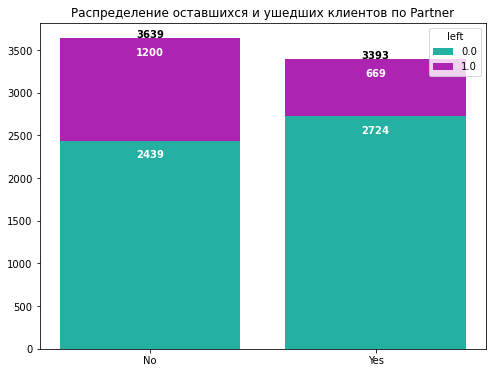

<IPython.core.display.Javascript object>

In [72]:
bar_plot("Partner")

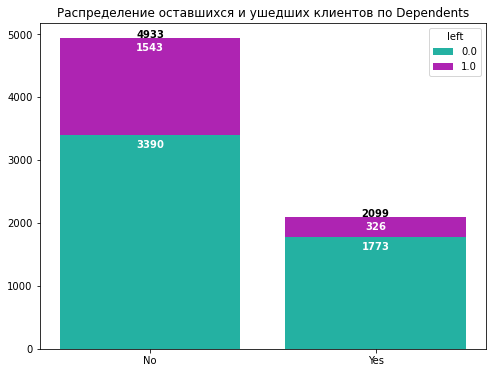

<IPython.core.display.Javascript object>

In [73]:
bar_plot("Dependents")

Из последних трех гистограмм можно сделать вывод, что большинство клиентов входят в категорию людей непенсионного возраста, не имеющие иждивенцев, при этом чаще расторгают контракт неженатые люди. Следовательно, компании стоит сфокусироваться на удержании молодежи.

Теперь посмотрим из-за каких услуг компания чаще всего теряет клиентов.

In [74]:
def pie_plot(x):
    agg_df1 = df[df["left"] == 0.0].groupby(x).count()["left"]
    agg_df2 = df[df["left"] == 1.0].groupby(x).count()["left"]

    fig = make_subplots(
        rows=1,
        cols=2,
        column_widths=[0.5, 0.5],
        row_heights=[0.5],
        specs=[[{"type": "pie"}, {"type": "pie"}]],
        subplot_titles=(
            "Распределение оставшихся клиентов по " + x,
            "Распределение ушедших клиентов по " + x,
        ),
    )

    labels = list(agg_df1.index)

    fig.add_trace(
        go.Pie(
            labels=labels,
            values=list(agg_df1),
            legendgroup="group",
            textinfo="percent+label",
        ),
        row=1,
        col=1,
    )

    fig.add_trace(
        go.Pie(
            labels=labels,
            values=list(agg_df2),
            legendgroup="group",
            textinfo="percent+label",
        ),
        row=1,
        col=2,
    )

    fig.update_annotations(font_size=11)
    fig.update_layout(
        margin=dict(l=30, r=30, t=30, b=5), height=300, width=800,
    )
    fig.show()

<IPython.core.display.Javascript object>

In [75]:
for x in [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "MultipleLines",
]:
    pie_plot(x)

<IPython.core.display.Javascript object>

Из полученных графиков видно, что большинство пользователей дополнительных интернет-услуг не разрывают контракты, что говорит о том, что они довольны качеством, ценой предоставляемых услуг. Значит, компании не имеет смысла здесь что-либо менять. Из круговой диаграммы для `MultipleLines` следует, что уходят в основном те, кто пользуется только телефонной связью, поэтому компании следует провести рекламную кампанию по подключению интернет-услуг, чтобы удержать потенциально уходящих клиентов.

Посмотрим теперь, как тип интернет-соединения влияет на отток клиентов.

In [76]:
pie_plot("InternetService")

<IPython.core.display.Javascript object>

Text(0.5, 1.0, '«Ящик с усами» для ежемесячных оплат клиентов с разными вариантами подключения интернет-соединения')

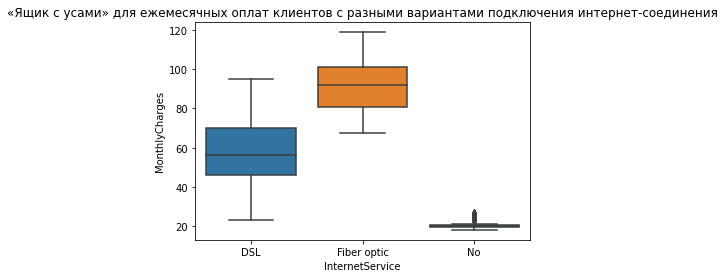

<IPython.core.display.Javascript object>

In [77]:
sns.boxplot(x="InternetService", y="MonthlyCharges", data=df)
plt.title(
    "«Ящик с усами» для ежемесячных оплат клиентов с разными вариантами подключения интернет-соединения"
)

Видим, что у большинство ушедших пользователей интернета было подключение по оптоволоконному кабелю, которое дороже, чем подключение через телефонную линию, но при этом качество интернета при таком соединении лучше. Значит, клиенты не готовы переплачивать за интернет с большей скоростью, поэтому компании стоит либо снизить стоимость интернета по оптоволоконному кабелю, либо найти какой-то более дешевый аналог с сопоставимым качеством.

Перейдем к типу оплаты.

Text(0.5, 1.0, 'Распределение клиентов по типу оплаты и расторжению договора')

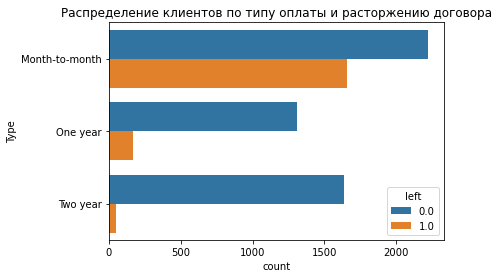

<IPython.core.display.Javascript object>

In [78]:
sns.countplot(y="Type", hue="left", data=df)
plt.title("Распределение клиентов по типу оплаты и расторжению договора")

Text(0.5, 1.0, '«Ящик с усами» для ежемесячных оплат при разных типах оплаты')

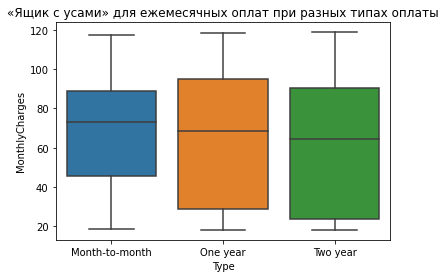

<IPython.core.display.Javascript object>

In [79]:
sns.boxplot(x="Type", y="MonthlyCharges", data=df)
plt.title("«Ящик с усами» для ежемесячных оплат при разных типах оплаты")

Text(0.5, 1.0, '«Ящик с усами» для ежемесячных оплат ушедших и оставшихся клиентов')

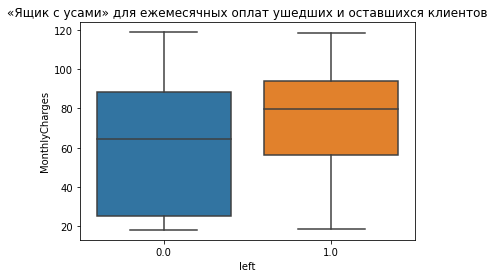

<IPython.core.display.Javascript object>

In [80]:
sns.boxplot(x="left", y="MonthlyCharges", data=df)
plt.title("«Ящик с усами» для ежемесячных оплат ушедших и оставшихся клиентов")

In [81]:
df["month"] = (df["length_days"] / 30).astype("int")

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Распределение оттока клиентов по длительности действия договора')

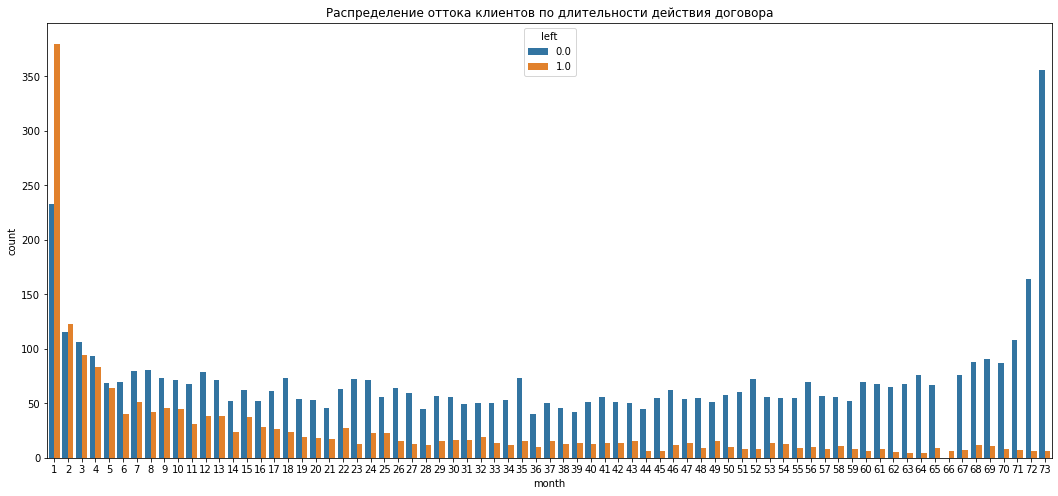

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(18, 8))
sns.countplot(x="month", hue="left", data=df)
plt.title("Распределение оттока клиентов по длительности действия договора")

Видим, что самый популярный ежемесячный платеж, но он же является и самым рискованным для компании, так как именно по этому тарифу наблюдается самый большой отток клиентов. Этот отток может быть следствием того, что новые клиенты бояться сразу заключать долгосрочный договор с ежегодной или двухгодичной оплатой, вследствие этого при ежемесячном тарифе они получают более высокий ежемесячный платеж, чем при более долгих тарифных планах, и, возможно, из-за этого быстро уходят. При этом клиенты с более долгим сроком оплаты уходят реже, вероятно, что это либо постоянные клиенты, которых все устраивает, и они не собираются уходить, либо это люди, заключившие долгосрочный контракт и вынужденные оставаться в компании до его окончания. В связи с приведенными выше рассуждениями, компании следует сделать более привлекательными тарифы с ежемесячной оплатой, либо стараться завлекать новых клиентов сразу на долгосрочные тарифы. Этого можно добиться путем снижения суммы ежемесячного платежа, что компания видимо уже начала делать, так как `MonthlyCharges` у оставшихся клиентов уже ниже, чем был у ушедших.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2 ✔️</b>
       
Интересные рассуждения и в целом я со всем согласен, можно такж подумать о создании дополнительных пакетов услуг
    
</div>


In [83]:
df.drop("month", axis=1, inplace=True)

<IPython.core.display.Javascript object>

## Построение и обучение моделей

Для решения данной задачи далее будут построены следующие модели:
- LogisticRegression;
- DecisionTreeClassifier;
- RandomForestClassifier;
- CatBoostClassifier;
- LGBMClassifier.

Разделим исходные данные на две выборки: обучающая(75%) и тестовая(25%).

In [84]:
RANDOM_STATE = 280323

<IPython.core.display.Javascript object>

In [85]:
target = df["left"]
features = df.drop("left", axis=1)
(features_train, features_test, target_train, target_test,) = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE
)

<IPython.core.display.Javascript object>

In [86]:
features_train.shape

(5274, 16)

<IPython.core.display.Javascript object>

In [87]:
features_train.head()

Type PaperlessBilling     PaymentMethod  MonthlyCharges  \
customerID                                                                      
2482-CZGBB  Month-to-month              Yes  Electronic check           70.00   
3143-ILDAL  Month-to-month              Yes  Electronic check           94.45   
9300-AGZNL  Month-to-month              Yes  Electronic check           94.00   
8290-YWKHZ  Month-to-month              Yes  Electronic check           93.20   
1492-QGCLU  Month-to-month               No  Electronic check           85.70   

            length_days  SeniorCitizen Partner Dependents InternetService  \
customerID                                                                  
2482-CZGBB          303              0      No         No     Fiber optic   
3143-ILDAL         1706              0      No         No     Fiber optic   
9300-AGZNL           31              1      No         No     Fiber optic   
8290-YWKHZ          975              1     Yes         No     Fiber optic   
1492-QGCLU         1614              0     Yes        Yes             DSL   

           OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
customerID                                                            
2482-CZGBB             No           No               No          No   
3143-ILDAL             No          Yes               No         Yes   
9300-AGZNL             No           No               No          No   
8290-YWKHZ             No           No               No          No   
1492-QGCLU            Yes           No              Yes         Yes   

           StreamingTV StreamingMovies MultipleLines  
customerID                                            
2482-CZGBB          No              No            No  
3143-ILDAL          No             Yes           Yes  
9300-AGZNL         Yes             Yes           Yes  
8290-YWKHZ         Yes             Yes           Yes  
1492-QGCLU         Yes             Yes           Yes

<IPython.core.display.Javascript object>

In [88]:
features_test.shape

(1758, 16)

<IPython.core.display.Javascript object>

Видим по количеству строк в каждой выборке, что разделение проведено правильно.

Посмотрим на относительные частоты классов в целевом признаке в df.

In [89]:
class_frequency = df["left"].value_counts(normalize=True)
class_frequency

0.0    0.734215
1.0    0.265785
Name: left, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:>

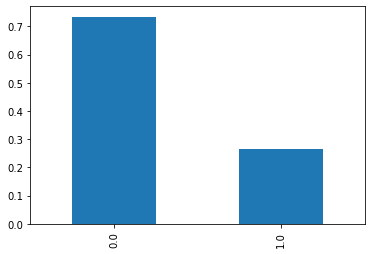

<IPython.core.display.Javascript object>

In [90]:
class_frequency.plot(kind="bar")

Видим, что в целевом признаке наблюдается дисбаланс классов.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2 ✔️</b>
       
Дисбаланс проверен и зафиксирован!
    
</div>


In [91]:
print(f"Количество строк в target_train по классам: {np.bincount(target_train)}")
print(f"Количество строк в target_test по классам: {np.bincount(target_test)}")

Количество строк в target_train по классам: [3860 1414]
Количество строк в target_test по классам: [1303  455]


<IPython.core.display.Javascript object>

Видим, что дисбаланс классов в `left` остается прежним и в полученных выборках, но так как исследуемая метрика roc_auc нечувствительна к дисбалансу классов, то он в дальнейшем не повлияет на результат обучения моделей.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   object 
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   left              7032 non-null   float64
 5   length_days       7032 non-null   int64  
 6   SeniorCitizen     7032 non-null   int64  
 7   Partner           7032 non-null   object 
 8   Dependents        7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  MultipleLines     7032 non-null 

<IPython.core.display.Javascript object>

Выделим категориальные признаки.

In [93]:
cat_columns = [
    "Type",
    "PaperlessBilling",
    "PaymentMethod",
    "Partner",
    "Dependents",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "MultipleLines",
    "SeniorCitizen",
]

<IPython.core.display.Javascript object>

In [94]:
num_columns = ["MonthlyCharges", "length_days"]

<IPython.core.display.Javascript object>

Рассмотрим модель логистической регрессии.

In [95]:
columns_transformer_log = ColumnTransformer(
    [
        ("num_encoder", StandardScaler(), num_columns),
        ("category_encoder", OneHotEncoder(handle_unknown="ignore",), cat_columns),
    ]
)

<IPython.core.display.Javascript object>

In [96]:
pipeline_log = Pipeline(
    [
        ("columns_transformer", columns_transformer_log),
        ("log", LogisticRegression(random_state=RANDOM_STATE)),
    ]
)

<IPython.core.display.Javascript object>

In [97]:
parameters_log = {
    "log__solver": ["liblinear", "lbfgs"],
    "log__max_iter": range(100, 1000, 100),
}

<IPython.core.display.Javascript object>

In [98]:
%%time
grid_log = GridSearchCV(pipeline_log, parameters_log, scoring="roc_auc", cv=5)
grid_log.fit(features_train, target_train)
grid_log.best_params_

Wall time: 8.74 s


{'log__max_iter': 100, 'log__solver': 'lbfgs'}

<IPython.core.display.Javascript object>

In [99]:
print(
    "roc_auc модели логистической регрессии на обучающей выборке:",
    grid_log.best_score_,
)

roc_auc модели логистической регрессии на обучающей выборке: 0.8468672443888865


<IPython.core.display.Javascript object>

Рассмотрим теперь дерево решений.

In [100]:
columns_transformer_tr = ColumnTransformer(
    [
        (
            "category_encoder",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
            cat_columns,
        ),
    ]
)

<IPython.core.display.Javascript object>

In [101]:
pipeline_tr = Pipeline(
    [
        ("columns_transformer", columns_transformer_tr),
        ("tr", DecisionTreeClassifier(random_state=RANDOM_STATE),),
    ]
)

<IPython.core.display.Javascript object>

In [102]:
parameters_tr = {
    "tr__max_depth": range(1, 10, 1),
}

<IPython.core.display.Javascript object>

In [103]:
%%time
grid_tr = GridSearchCV(pipeline_tr, parameters_tr, scoring="roc_auc", cv=5)
grid_tr.fit(features_train, target_train)
grid_tr.best_params_

Wall time: 2.33 s


{'tr__max_depth': 5}

<IPython.core.display.Javascript object>

In [104]:
print(
    "roc_auc модели дерева решений на обучающей выборке:", grid_tr.best_score_,
)

roc_auc модели дерева решений на обучающей выборке: 0.8113629437396048


<IPython.core.display.Javascript object>

Построим теперь модель случайного леса.

In [105]:
pipeline_rf = Pipeline(
    [
        ("columns_transformer", columns_transformer_tr),
        ("rf", RandomForestClassifier(random_state=RANDOM_STATE)),
    ]
)

<IPython.core.display.Javascript object>

In [106]:
parameters_rf = {
    "rf__n_estimators": range(100, 201, 10),
    "rf__max_depth": range(1, 10, 1),
}

<IPython.core.display.Javascript object>

In [107]:
%%time
grid_rf = GridSearchCV(pipeline_rf, parameters_rf, scoring="roc_auc", cv=5)
grid_rf.fit(features_train, target_train)
grid_rf.best_params_

Wall time: 3min 34s


{'rf__max_depth': 4, 'rf__n_estimators': 200}

<IPython.core.display.Javascript object>

In [108]:
print(
    "roc_auc модели случайного леса на обучающей выборке:", grid_rf.best_score_,
)

roc_auc модели случайного леса на обучающей выборке: 0.8286618349367683


<IPython.core.display.Javascript object>

Далее построим модель градиентного бустинга с помощью библиотек CatBoost и LightGBM.

In [109]:
pipeline_CBR = Pipeline(
    [
        (
            "CBR",
            CatBoostClassifier(
                random_state=RANDOM_STATE,
                loss_function="Logloss",
                eval_metric="AUC",
                cat_features=cat_columns,
                verbose=False,
            ),
        ),
    ]
)

<IPython.core.display.Javascript object>

In [110]:
parameters_CBR = {
    "CBR__depth": [3, 4],
    "CBR__learning_rate": [0.3, 0.5],
    "CBR__iterations": [500],
}

<IPython.core.display.Javascript object>

In [111]:
%%time
grid_CBR = GridSearchCV(pipeline_CBR, parameters_CBR, scoring="roc_auc", cv=5)
grid_CBR.fit(features_train, target_train)
grid_CBR.best_params_

Wall time: 4min 43s


{'CBR__depth': 3, 'CBR__iterations': 500, 'CBR__learning_rate': 0.3}

<IPython.core.display.Javascript object>

In [112]:
print(
    "roc_auc модели CatBoostClassifier на обучающей выборке:", grid_CBR.best_score_,
)

roc_auc модели CatBoostClassifier на обучающей выборке: 0.9325469379826391


<IPython.core.display.Javascript object>

In [113]:
features_train[cat_columns] = features_train[cat_columns].astype("category")

<IPython.core.display.Javascript object>

In [114]:
pipeline_lgb = Pipeline(
    [("lgb", lgb.LGBMClassifier(random_state=RANDOM_STATE, verbosity=-1,),),]
)

<IPython.core.display.Javascript object>

In [115]:
parameters_lgb = {
    "lgb__max_depth": [3, 4],
    "lgb__learning_rate": [0.3, 0.5],
    "lgb__n_estimators": [500],
}

<IPython.core.display.Javascript object>

In [116]:
%%time
grid_lgb = GridSearchCV(pipeline_lgb, parameters_lgb, scoring="roc_auc", cv=5)
grid_lgb.fit(features_train, target_train)
grid_lgb.best_params_

Wall time: 6.85 s


{'lgb__learning_rate': 0.3, 'lgb__max_depth': 3, 'lgb__n_estimators': 500}

<IPython.core.display.Javascript object>

In [117]:
print(
    "roc_auc модели LGBMClassifier на обучающей выборке:", grid_lgb.best_score_,
)

roc_auc модели LGBMClassifier на обучающей выборке: 0.9141733016035388


<IPython.core.display.Javascript object>

Из полученных значений метрики roc_auc для различных моделей следует, что лучший результат по соотношению значение метрики-время обучения показала модель градиентного бустинга LGBMClassifier со следующими значениями гиперпараметров: 'lgb__learning_rate': 0.3, 'lgb__max_depth': 3, 'lgb__n_estimators': 500. Проверим ее качество на тестовой выборке.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2 ✔️</b>
       
По работе с моделями замечаний нет, все грамотно сделано!) Единственное про время обучения нам говорить не приходится, потому что тут ты измеряешь время подбора гиперпараметров, а не обучения. Время обучения/предсказания можно достать из GridSearchCV, если хочется брать в расчет эти характеристики)
    
    
</div>


In [118]:
features_test[cat_columns] = features_test[cat_columns].astype("category")

<IPython.core.display.Javascript object>

In [119]:
predictions = grid_lgb.predict_proba(features_test)
roc_auc_score(target_test, predictions[:, 1])

0.9129304310424802

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2 ✔️</b>
       
Проверка есть!
    
</div>


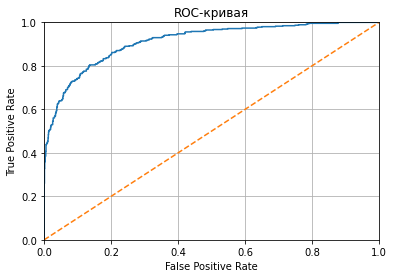

<IPython.core.display.Javascript object>

In [120]:
probabilities_one_test = predictions[:, 1]

fpr, tpr, thresholds = fpr, tpr, thresholds = roc_curve(
    target_test, probabilities_one_test
)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.grid()
plt.show()

Видим, что модель LGBMClassifier показывает близкие значения метрики roc_auc на обучающей и на тестовой выборке. Желаемая точность модели на тестовой выборке достигается (roc_auc=0.91 > 0.85).

Проанализируем полученную лучшую модель.

In [121]:
predicted_test = grid_lgb.predict(features_test)

<IPython.core.display.Javascript object>

Text(0.5, 1.1, 'Матрица ошибок')

<Figure size 576x432 with 0 Axes>

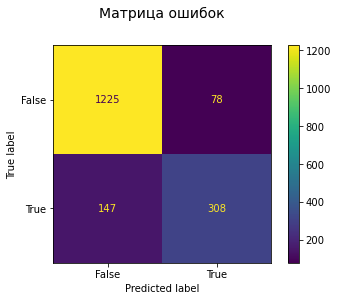

<IPython.core.display.Javascript object>

In [122]:
plt.figure(figsize=(8, 6))
confusion_matrix = metrics.confusion_matrix(target_test, predicted_test)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True]
)

cm_display.plot()
plt.title("Матрица ошибок", y=1.1, size=14)

Матрица ошибок показывает, что найденная модель лучше всего предсказывает отрицательный класс (клиент останется) и при этом достаточно редко ошибается.

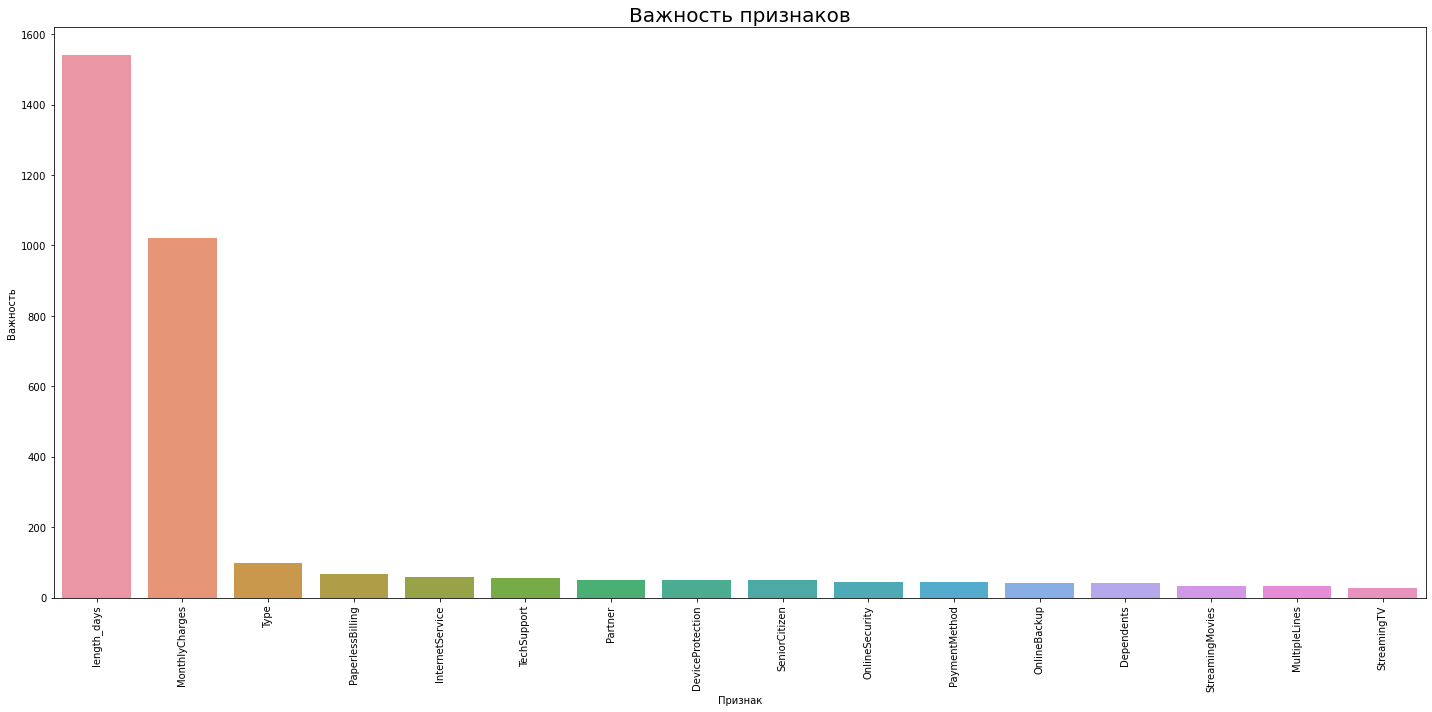

<IPython.core.display.Javascript object>

In [123]:
feature_imp = pd.DataFrame(
    sorted(
        zip(
            grid_lgb.best_estimator_.named_steps["lgb"].feature_importances_,
            features_test.columns,
        )
    ),
    columns=["Value", "Feature"],
)

plt.figure(figsize=(20, 10))
sns.barplot(
    x="Feature", y="Value", data=feature_imp.sort_values(by="Value", ascending=False)
)
plt.title("Важность признаков", size=20)
plt.xticks(rotation="vertical")
plt.xlabel("Признак")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()

Видим, что наиболее важными для нашей модели были признаки `length_days` и `MonthlyCharges`.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Итоговый комментарий тимлида V2 ✔️</b>
       
Отличное выполнения второй части, все грамотно и на своем месте, ничего лишнего и видно, что ты с пониманием процесса выполнял задачу, молодец! Принимаю вторую часть) Вижу, что ниже ты уже подготовил отчет, но смотреть я его буду только на 3 этапе, чтобы платформа зафиксировала прогресс, пришли мне эту же тетрадку)  
    
----  
    
P.s. Вижу что в отчете все хорошо, добавь только в него весь список признаков на которых обучалась лучшая модель
    
</div>


<div class="alert alert-info">
Добавил.
</div>

## Отчет

1. В ходе предобработки данных:
- были изучены данные из четырех файлов: `contract.csv`, `personal.csv`, `internet.csv`, `phone.csv`, в которых были найдены как категориальные, так и количественные признаки;
- было установлено, что данные датафреймы не содержали пропусков и дубликатов;
- в датафрейме `df_contract` в столбце `TotalCharges` были обнаружены пустые значения, они были удалены, тип данных данного столбца был изменен на float;
- столбцы `EndDate` и `BeginDate` были удалены и заменены на столбец `length_days`;
- был создан целевой призанк `left`;
- для дальнейшего анализа таблицы были объеденены в один датафрейм `df`, в результате чего образовались пропуски в столбцах, описывающих интернет-услуги и услуги связи, так как не все клиенты пользуются обоими типами услуг, эти пропуски были обработаны.
2. В результате исследовательского анализа данных:
- была установлена высокая корреляция (> 0.8) между `TotalCharges` и `length_days`, поэтому столбец `TotalCharges` был удален;
- была определна сильная связь между `MonthlyCharges` и дополнительными услугами, ежемесячной оплатой и `InternetService`;
- было выяснено, что уход клиента не зависит от его пола, поэтому данный признак был удален;
- был сделан вывод, что большинство пользователей недовольны оплатой по электронному чеку;
- был создан портрет клиента: молодой неженатый человек без иждивенцев;
- было установлено, что пользователи в целом довольны качеством предостваляемых дополнительных интернет-услуг, но их не устраивает подключение к интернету по оптоволоконному кабелю;
- выяснилось, что в основном уходу подвержены клиенты с тарифом с ежемесячной оплатой;
- был обнаружен дисбаланс классов в целевом признаке.
3. Для прогнозирования ухода клиентов были построены следующие модели:
- LogisticRegression;
- DecisionTreeClassifier;
- RandomForestClassifier;
- CatBoostClassifier;
- LGBMClassifier.

    Лучшее сочетание значения метрики auc_roc и времени обучения было достигнуто в модели LGBMClassifier со следующими значениями гиперпараметров: 'lgb__learning_rate': 0.3, 'lgb__max_depth': 3, 'lgb__n_estimators': 500 при обучении на следующих значениях гиперпараметров: "lgb__max_depth": [3, 4], "lgb__learning_rate": [0.3, 0.5], "lgb__n_estimators": [500],. При этом наиболее значимыми для модели признакми оказались: `length_days` и `MonthlyCharges`.


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Итоговый комментарий тимлида V3 ✔️</b>
       
Спасибо за проделанную работу! Получился отличный отчет) Принимаю финальный проект и поздравляю с завершением курса! Впереди еще будет много интересного, сфера Data Science постоянно развивается и не дает скучать) Мы еще увидимся на финальном созвоне, а пока что можно чуть-чуть отдохнуть!  
    
----  
    
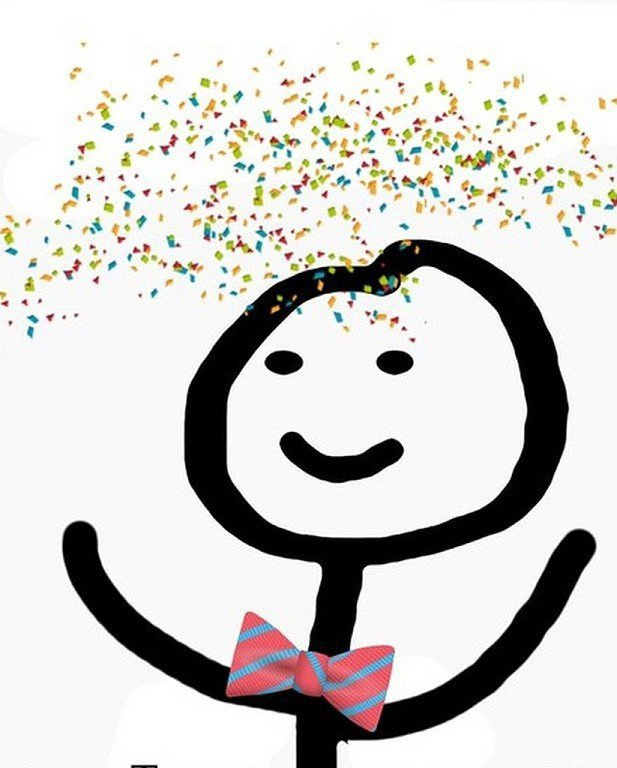
    
</div>
